In [5]:
#1.Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [7]:
#1.Importamos librerias
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import sklearn
from sklearn.metrics import mean_squared_error

In [485]:
data4=pd.read_csv("archivos/InvoicePurchases12312016.csv",parse_dates=["PODate","PayDate","InvoiceDate"])

In [9]:
#2. Abrimos los dataset
data1=pd.read_csv("archivos/2017PurchasePricesDec.csv")
data2=pd.read_csv("archivos/BegInvFINAL12312016.csv",parse_dates=["startDate"])
data3=pd.read_csv("archivos/EndInvFINAL12312016.csv",parse_dates=["endDate"])
data4=pd.read_csv("archivos/InvoicePurchases12312016.csv",parse_dates=["PODate","PayDate","InvoiceDate"])
data5=pd.read_csv("archivos/PurchasesFINAL12312016.csv",parse_dates=["PODate","PayDate","InvoiceDate","ReceivingDate"])
data6=pd.read_csv("archivos/SalesFINAL12312016.csv",parse_dates=["SalesDate"])
datas=[data1,data2,data3,data4,data5,data6]
names=["Productos","Inventario Incial","Inventario Final","Compras","Detalle Compras","Ventas"]

In [457]:
#3. EDA INCIAL - Analizamos datasetes
#   A. Análisis Integral EDA
for i in range(0,len(datas)):
    eda_report(datas[i], names[i])
    


EDA REPORT: Productos

--- FORMA DEL DATAFRAME ---
Filas: 12261 | Columnas: 9

--- PRIMERAS FILAS ---
   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         

--- TIPOS DE DATOS POR COLUMNA ---
Brand               

In [ ]:
DEL ANALISIS INTEGRAL DEL EDA INCIAL PODEMOS OBSERVAR LO SIGUIENTE:
   A. COLUMAS CON VALORES FALTANTES  --> (En data1,data3,data5)
   B. COLUMNAS CON ALTA VARIABLIDAD --> las analizaremos a para ver si en necesario remplazar o no
   C. COLUMNAS CON VALOR MINIMO CERO --> las analizaremos a para ver si en necesario remplazar o no
   D. COLUMNAS NUMERICAS QUE SON CATEGORIAS --> (Store, Brand, VendorNumber)
   E. INFORMACION DE LAS TABLAS
       * data1 detalla los Productos
       * data2 detalla Inventario Inicial al 01-01-2016
       * data3 detalla Inventario final al 31-12-2016
       * data4 detalla Compras 
       * data5 detalla Detalle de Compras
       * data6 detalla Ventas

In [587]:
##3. EDA INCIAL - Analizamos datasetes
#  A. Análisis Integral EDA
print("El rango de fechas de data4 (tabla Compras) esta entre: ", data4["InvoiceDate"].min(), " y " , data4["InvoiceDate"].max())
print("El rango de fechas de data5 (tabla Detalle Compras) esta entre: ", data5["InvoiceDate"].min(), " y " , data5["InvoiceDate"].max())
print("El rango de fechas de data6 (tabla Ventas) esta entre: ", data6["SalesDate"].min(), " y " , data6["SalesDate"].max())

El rango de fechas de data4 (tabla Compras) esta entre:  2016-01-04 00:00:00  y  2017-01-10 00:00:00
El rango de fechas de data5 (tabla Detalle Compras) esta entre:  2016-01-04 00:00:00  y  2017-01-10 00:00:00
El rango de fechas de data6 (tabla Ventas) esta entre:  2016-01-01 00:00:00  y  2016-02-29 00:00:00


In [ ]:
🚨 UN DATO A TENER EN CUENTA SEGUN LA INFORMACION ANTERIOR ES QUE NO SE TIENEN TODOS LOS DATOS LAS VENTAS ANUALES
   ENTONCES:
       ⚠️ Vamos a tener que obtener la demanda diaria de esta serie,
       ⚠️ luego estimar la demanda diaria para los productos sin ventas.
       ⚠️ para luego poder obtener la demanda estimada anual y stock optimo para cada producto.

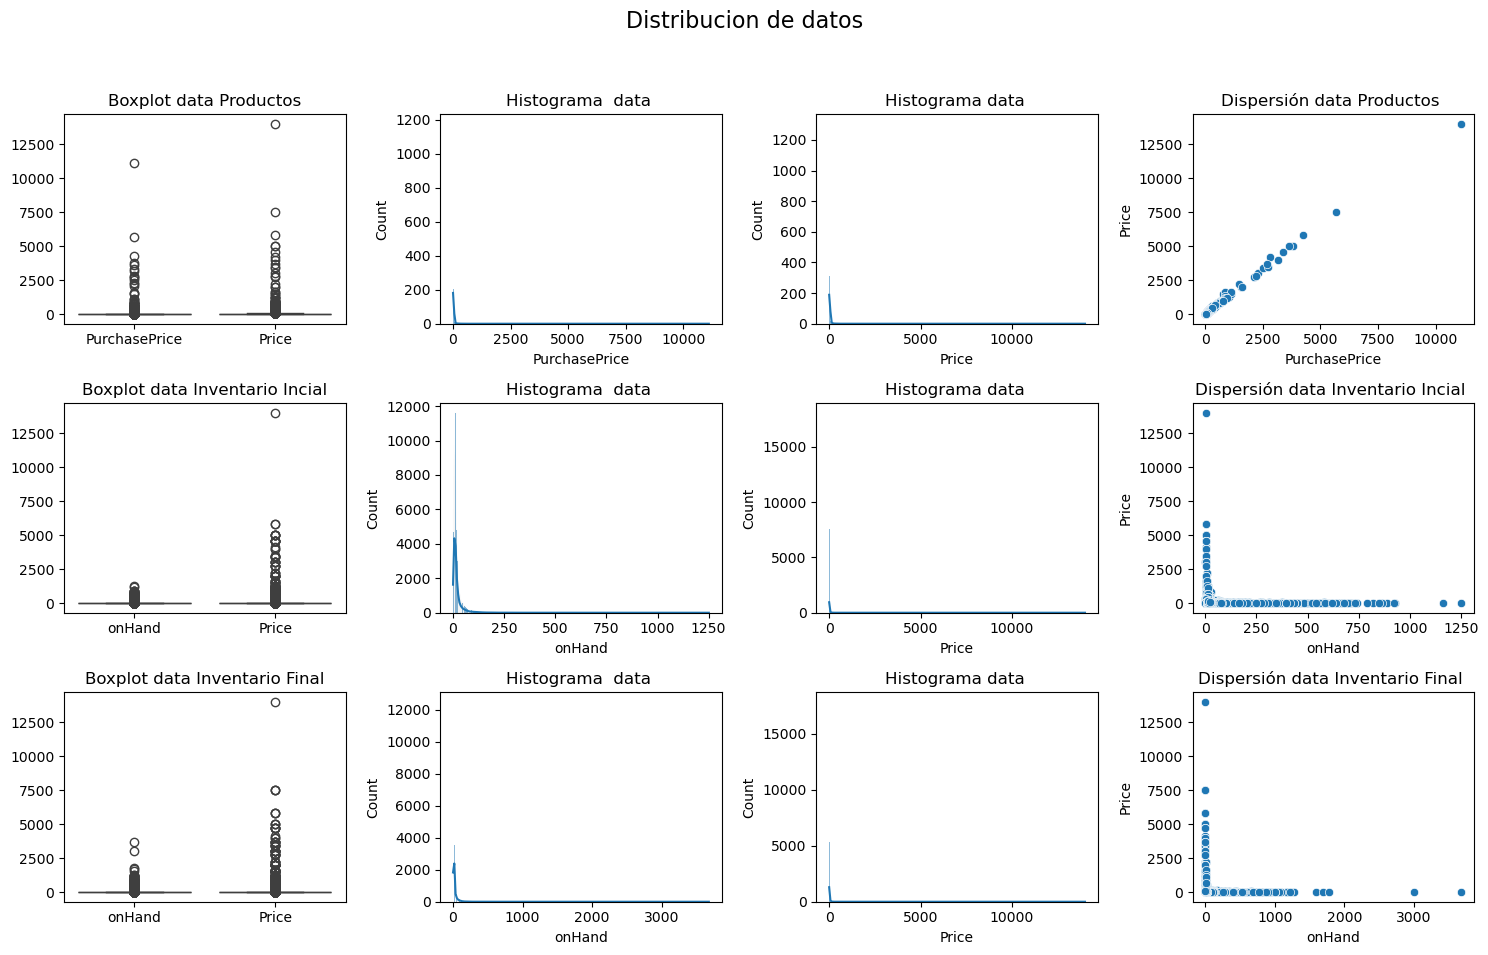

In [459]:
#3. EDA INCIAL - Analizamos datasetes
#  B.  Analizamos distribición y relación de columnas con alta variabilidad
columnas_variabilidad=[["PurchasePrice","Price"],["onHand","Price"],["onHand","Price"],["Quantity","Dollars"],["Quantity","PurchasePrice"],["SalesQuantity","SalesPrice"]]
datas=[data1,data2,data3,data4,data5,data6]
names=["Productos","Inventario Incial","Inventario Final","Compras","Detalle Compras","Ventas"]

#PRIMERAS TRES TABLAS
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for idx in range(0,3):  #PRIMERAS TRES TABLAS
    cols=columnas_variabilidad[idx]
    col1=cols[0]
    col2=cols[1]
    name=names[idx]
    data=datas[idx].copy()
    dataA=data[cols]
    graficar_boxplot_histograma(data,dataA,col1, col2, idx, name)

plt.suptitle("Distribucion de datos", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Quantity Dollars
Quantity PurchasePrice
SalesQuantity SalesPrice


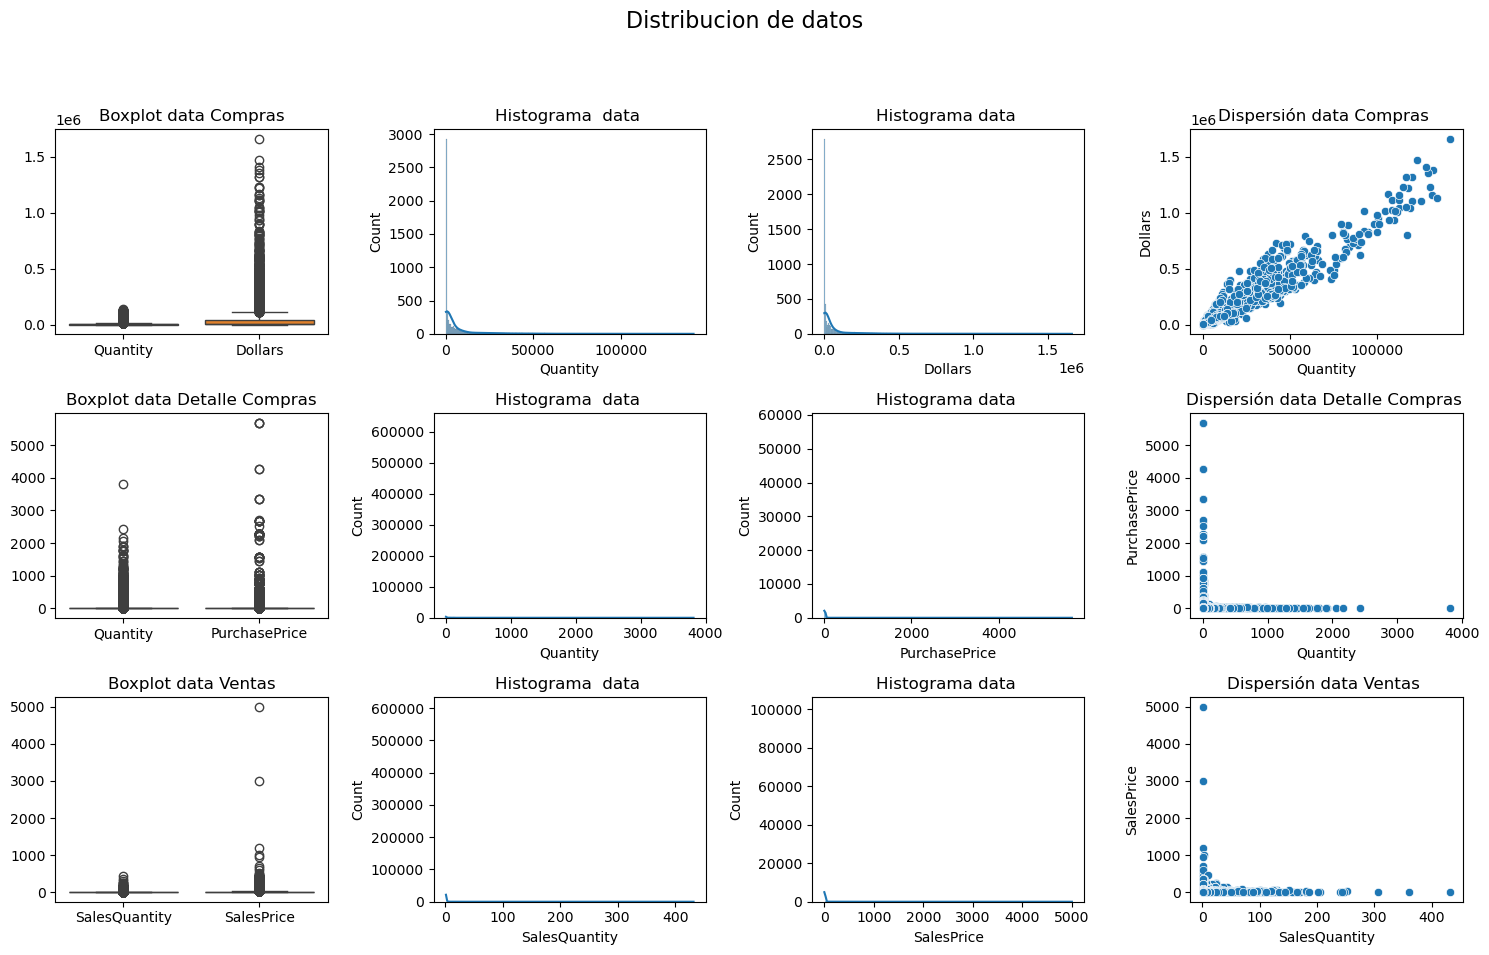

In [460]:
#3. EDA INCIAL - Analizamos datasetes
#  B.  Analizamos distribición y relación de columnas con alta variabilidad
columnas_variabilidad=[["PurchasePrice","Price"],["onHand","Price"],["onHand","Price"],["Quantity","Dollars"],["Quantity","PurchasePrice"],["SalesQuantity","SalesPrice"]]
datasA=[data1,data2,data3,data4,data5,data6]
names=["Productos","Inventario Incial","Inventario Final","Compras","Detalle Compras","Ventas"]

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for idx in range(0,3):  #SEGUNDAS TRES TABLAS
    cols=columnas_variabilidad[idx+3]
    col1=cols[0]
    col2=cols[1]
    print(col1,col2)
    name=names[idx+3]
    data=datas[idx+3].copy()
    dataA=data[cols]
    graficar_boxplot_histograma(data,dataA,col1, col2, idx, name)

plt.suptitle("Distribucion de datos", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


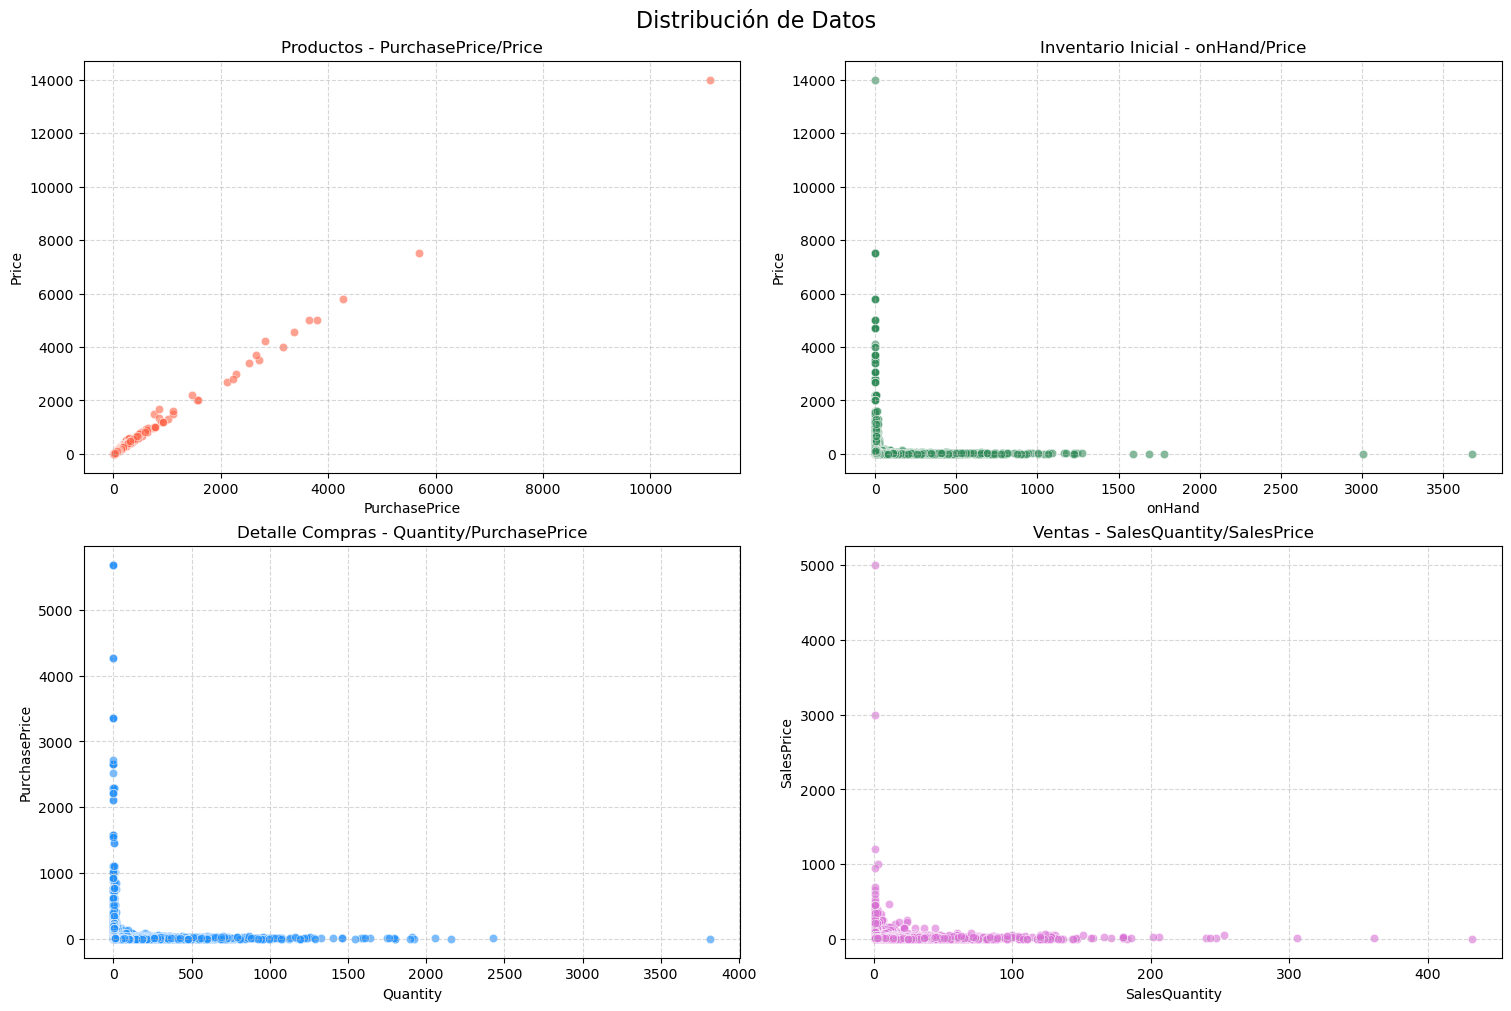

In [15]:
#3. EDA INCIAL - Analizamos datasetes
#  B.  Analizamos distribición y relación de columnas con alta variabilidad
columnas_variabilidad=[["PurchasePrice","Price"],["onHand","Price"],["onHand","Price"],["Quantity","Dollars"],["Quantity","PurchasePrice"],["SalesQuantity","SalesPrice"]]
datas=[data1,data2,data3,data4,data5,data6]
names=["Productos","Inventario Incial","Inventario Final","Compras","Detalle Compras","Ventas"]
fig, axes = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)
colores = ['tomato', 'seagreen', 'dodgerblue', 'orchid']
titulos = [
    'Productos - PurchasePrice/Price',
    'Inventario Inicial - onHand/Price',
    'Detalle Compras - Quantity/PurchasePrice',
    'Ventas - SalesQuantity/SalesPrice'
]
data_list = [data1, data3, data5, data6]
x_list = ['PurchasePrice', 'onHand', 'Quantity', 'SalesQuantity']
y_list = ['Price', 'Price', 'PurchasePrice', 'SalesPrice']

for i, ax in enumerate(axes.flat):
    sns.scatterplot(data=data_list[i], x=x_list[i], y=y_list[i], ax=ax, color=colores[i], alpha=0.6)
    ax.set_title(titulos[i])
    ax.set_xlabel(x_list[i])
    ax.set_ylabel(y_list[i])
    ax.grid(True, linestyle='--', alpha=0.5)

fig.suptitle("Distribución de Datos", fontsize=16)
plt.show()





In [21]:
columnas_variabilidad=[["PurchasePrice","Price"],["onHand","Price"],["onHand","Price"],["Quantity","Dollars"],["Quantity","PurchasePrice"],["SalesQuantity","SalesPrice"]]

In [95]:
plt.savefig("graficos_eda_inicial.png")  # Guarda la figura como imagen PNG
plt.show()

<Figure size 640x480 with 0 Axes>

In [23]:
# 3. EDA INCIAL - Analizamos datasetes
#   C. Analizamos columnas numericas con valores igual a 0
for i in range(0,len(datas)):
    col=columnas_variabilidad[i]
    data_cero=datas[i] 
    col1=col[0]
    data_cero1=data_cero[data_cero[col1]==0] 
    col2=col[1]
    data_cero2=data_cero[data_cero[col2]==0]
    print("------------------")
    print("TABLA:", names[i])
    print("En la columna ", col1, "hay ", len(data_cero1), " valores iguales a cero")
    print("En la columna ", col2, "hay ", len(data_cero2), " valores iguales a cero")
    if len(data_cero1)>0 and len(data_cero1)<200:
        print("los productos con ", col1, "igual a cero son: ",set(data_cero1["Brand"]))
    if len(data_cero2)>0 and len(data_cero2)<200:
        print("los productos con ", col2, "igual a cero son: ",set(data_cero2["Brand"]))
    print("------------------")   

------------------
TABLA: Productos
En la columna  PurchasePrice hay  1  valores iguales a cero
En la columna  Price hay  2  valores iguales a cero
los productos con  PurchasePrice igual a cero son:  {2166}
los productos con  Price igual a cero son:  {4202, 2166}
------------------
------------------
TABLA: Inventario Incial
En la columna  onHand hay  6044  valores iguales a cero
En la columna  Price hay  2  valores iguales a cero
los productos con  Price igual a cero son:  {19138}
------------------
------------------
TABLA: Inventario Final
En la columna  onHand hay  7230  valores iguales a cero
En la columna  Price hay  0  valores iguales a cero
------------------
------------------
TABLA: Compras
En la columna  Quantity hay  0  valores iguales a cero
En la columna  Dollars hay  0  valores iguales a cero
------------------
------------------
TABLA: Detalle Compras
En la columna  Quantity hay  0  valores iguales a cero
En la columna  PurchasePrice hay  153  valores iguales a cero
los

In [25]:
#4. TRANSFORMACION Y LIMPIEZA DE DATOS - ETL
#  A. Remplazo de valores faltantes
#     a. Nulo en data1 (Tabla Productos) - Columnas Description, Size, Volume - Buscamos similar en la data1 para remplazar

mascara_nulos = data1[data1['Size'].isnull()]
mascara_nulos1 = data1[data1['Description'].isnull()]
mascara_nulos2 = data1[data1['Volume'].isnull()]
print("la cantidad de productoos con Size nulos es; ",len(mascara_nulos), " y esos productos son",set(mascara_nulos["Brand"])) 
print("la cantidad de productos con Description nulos es; ",len(mascara_nulos1), " y esos productos son",set(mascara_nulos1["Brand"])) 
print("la cantidad de productos con Volumne nulos es; ",len(mascara_nulos2), " y esos productos son",set(mascara_nulos2["Brand"])) 

# Buscamos similar con VendorName y PruchasePrice, luego remplazamo
h=0
k=""
m=0
mm=0
for i in range(0,len(data1)):
    if pd.isnull(data1.loc[i,"Size"]):  #nulo en data
        h=data1.loc[i,"PurchasePrice"]  #PurchasePrice del nulo   
        k=data1.loc[i,"VendorName"]     #VendorName del nulo
        m=i
        print("la ubicacion del valor faltantes es: ",m)
    if data1.loc[i,"PurchasePrice"]==h and data1.loc[i,"VendorName"]==k and m!=i:  #buscamos similar al nulo
        mm=i
        print("la ubicacion del valor similar es: ",mm)
#Remplazamos valor faltante con el similar        
data1.loc[m,"Description"]="Bacardi"
data1.loc[m,"Price"]=data1.loc[mm,"Price"]
data1.loc[m,"Size"]=data1.loc[mm,"Size"]
data1.loc[m,"Volume"]=data1.loc[mm,"Volume"]

print("-----------Luego del Remplazo------------------")
mascara_nulos = data1[data1['Size'].isnull()]
mascara_nulos1 = data1[data1['Description'].isnull()]
mascara_nulos2 = data1[data1['Volume'].isnull()]
print("la cantidad de productoos con Size nulos es; ",len(mascara_nulos), " y esos productos son",set(mascara_nulos["Brand"])) 
print("la cantidad de productos con Description nulos es; ",len(mascara_nulos1), " y esos productos son",set(mascara_nulos1["Brand"])) 
print("la cantidad de productos con Volumne nulos es; ",len(mascara_nulos2), " y esos productos son",set(mascara_nulos2["Brand"])) 





la cantidad de productoos con Size nulos es;  1  y esos productos son {4202}
la cantidad de productos con Description nulos es;  1  y esos productos son {4202}
la cantidad de productos con Volumne nulos es;  1  y esos productos son {4202}
la ubicacion del valor faltantes es:  7915
la ubicacion del valor similar es:  10418
-----------Luego del Remplazo------------------
la cantidad de productoos con Size nulos es;  0  y esos productos son set()
la cantidad de productos con Description nulos es;  0  y esos productos son set()
la cantidad de productos con Volumne nulos es;  0  y esos productos son set()


In [27]:
#4. TRANSFORMACION Y LIMPIEZA DE DATOS - ETL
#  A. Remplazo de valores faltantes
#     b. Nulo de data5 (Tabla Detalle Compras) - Columnas Size - Buscamos el valor en  data1 (Tabla Productos)

mascara_nulos = data5[data5["Size"].isnull()]  #Detalle de compras con Size nulo
print("La cantidad de Detalle de Compra con Size nulos, son: ",len(mascara_nulos), " y los productos correspondientes son",set(mascara_nulos["Brand"])) 

# Merge para traer el campo Size desde data1
data5 = data5.merge(
    data1[["Brand", "Size"]],
    on="Brand",
    how="left",
    suffixes=("", "_from_data1"))

# Reemplazamos valores nulos de 'Size' con los de data1
data5["Size"] = data5["Size"].fillna(data5["Size_from_data1"])

# Eliminamos la columna auxiliar
data5.drop(columns=["Size_from_data1"], inplace=True)

print("-------Luego del remplazo--------------")
mascara_nulos = data5[data5["Size"].isnull()]  #producto sin Size
print("la Cantidad de Detalle de Compra con Size nulos es; ",len(mascara_nulos), " y esos productos son",set(mascara_nulos["Brand"])) 

La cantidad de Detalle de Compra con Size nulos, son:  3  y los productos correspondientes son {3121, 15365, 5678}
-------Luego del remplazo--------------
la Cantidad de Detalle de Compra con Size nulos es;  0  y esos productos son set()


In [29]:
#4. TRANSFORMACION Y LIMPIEZA DE DATOS - ETL
#  A. Remplazo de valores faltantes
#   c. Nulo de data3 (Tabla Inventario Final) - Columna City - Buscamos los Store en el InventoryId, luego con el Store buscamos la City en data2 
mascara_nulos = data3[data3["City"].isnull()]  #InventoryId sin City
print("Los InventortyId con City nulos son: ",len(mascara_nulos))

#definimos los InventoryID con columna City con valores nulos
nulos=[]
for i in range(0,len(mascara_nulos)):
    h=mascara_nulos.iloc[i,0]
    nulos.append(h)
    
#Buscamos la stores dentro del valor IdentityID (primeros numeros antes del primer _) para definir la store y luego ciudad
stores=[]
for j in nulos:
    cadena = j
    primeras_dos_letras = cadena[0] + cadena[1]
    if primeras_dos_letras not in stores:
        stores.append(primeras_dos_letras)
stores = [s.replace("_", "") for s in stores]
print("Stores sin localidad:",stores)

#Buscamos el Store en data2 y despues remplazamos
store1 = stores[0]  #obtenemos el valor del store a buscar
idx = data2[data2["Store"]==46].index[0] #buscamos un indice con valor Store 46 en data2
City = data2.loc[idx,"City"]  #buscamos el indice con valor City nulo en data3
data3["City"]=data3["City"].fillna(City) # remplazamos el valor faltante con el valor de data2
print("La ciudad faltante es :", City)

data_city=data3.groupby("Store").agg({"City": "first"}).reset_index()

print("-------------Luego del Remplazo---------------")
mascara_nulos = data3[data3["City"].isnull()]  #producto sin Size
print("Los InventortyId con City nulos son: ",len(mascara_nulos))

#    d. nulos data4 eliminamos columna Aproval (es una columna con muchos nulos que no usaremos)
data4=data4.drop(columns="Approval")

Los InventortyId con City nulos son:  1284
Stores sin localidad: ['46']
La ciudad faltante es : TYWARDREATH
-------------Luego del Remplazo---------------
Los InventortyId con City nulos son:  0


In [471]:
#4. TRANSFORMACION Y LIMPIEZA DE DATOS - ETL
#  B. Remplazo de columnas con columnas numericas = 0 
#     b. En data1 (Tabla Productos) - Columnas Precio y PurchasePrice - Buscamos similares con excel ya que es un solo elemento con valores cero

mascara_ceros = data1[data1["Price"]==0]#producto sin Price
mascara_ceros1 = data1[data1["PurchasePrice"]==0]#producto sin PurchasePrice
print("la cantidad de productos con Price ceros es; ",len(mascara_ceros), " y esos productos son",set(mascara_ceros["Brand"]) )
print("la cantidad de productos con PurchasePrice ceros es; ",len(mascara_ceros1), " y esos productos son",set(mascara_ceros1["Brand"])) 

## Buscamos similar con excel luego remplazamos. El valor similar es 2945
print("-----------Filas comparadas------------------")
mm=data1[data1["Brand"]==2945].index[0]  #index del similar
m=data1[data1["Brand"]==2166].index[0] #index del faltante
print("La fila faltante es: ", list(data1.iloc[m,:]))
print("La fila similar es: ", list(data1.iloc[mm,:]))

#rellenamos valor faltante con el similar    
data1.loc[m,"Price"]=data1.loc[mm,"Price"]
data1.loc[m,"PurchasePrice"]=data1.loc[mm,"PurchasePrice"]

print("-----------Luego del Remplazo------------------")
mascara_ceros = data1[data1["Price"]==0]#producto sin Price
mascara_ceros1 = data1[data1["PurchasePrice"]==0]#producto sin PurchasePrice
print("la cantidad de productos con Price ceros es; ",len(mascara_ceros), " y esos productos son",set(mascara_ceros["Brand"]) )
print("la cantidad de productos con PurchasePrice ceros es; ",len(mascara_ceros1), " y esos productos son",set(mascara_ceros1["Brand"])) 

la cantidad de productos con Price ceros es;  1  y esos productos son {2166}
la cantidad de productos con PurchasePrice ceros es;  1  y esos productos son {2166}
-----------Filas comparadas------------------
La fila faltante es:  [2166, 'The Macallan Double Cask 12', 0.0, '750mL', '750', 1, 0.0, 2561, 'EDRINGTON AMERICAS         ']
La fila similar es:  [2945, 'The Macallan Rare Cask', 299.99, '750mL', '750', 1, 213.17, 2561, 'EDRINGTON AMERICAS         ']
-----------Luego del Remplazo------------------
la cantidad de productos con Price ceros es;  0  y esos productos son set()
la cantidad de productos con PurchasePrice ceros es;  0  y esos productos son set()


In [31]:
#4. TRANSFORMACION Y LIMPIEZA DE DATOS - ETL
#  B. Remplazo de columnas con columnas numericas = 0 
#     b. En data 2 (Tabla Inventario Incicial) - Columnas Price - Buscamos valor en data1 (Tabla Productos)
mascara_ceros = data2[data2["Price"]==0]  # Inventario con Price=0
print("La cantidad InventoryId con ceros en Price, es: ",len(mascara_ceros), " y los productos correspondientes son",set(mascara_ceros["Brand"])) 

# Merge para traer el campo Price desde data1
data2 = data2.merge(
    data1[["Brand", "Price"]],
    on="Brand",
    how="left",
    suffixes=("", "_from_data1"))
# Reemplazamos valores nulos de 'Price' con los de data1
data2["Price"] = data2["Price"].fillna(data2["Price_from_data1"])

# Eliminamos la columna auxiliar
data2.drop(columns=["Price_from_data1"], inplace=True)
print("-------Luego del remplazo--------------")
mascara_ceros = data2[data2["Price"].isnull()]  #producto sin Size
print("La cantidad InventoryId con ceros en Price, es ",len(mascara_ceros), " y esos productos son",set(mascara_ceros["Brand"])) 

La cantidad InventoryId con ceros en Price, es:  2  y los productos correspondientes son {19138}
-------Luego del remplazo--------------
La cantidad InventoryId con ceros en Price, es  0  y esos productos son set()


In [33]:
#4. TRANSFORMACION Y LIMPIEZA DE DATOS - ETL
#  B. Remplazo de columnas con columnas numericas = 0 
#     b. En data 5 (Tabla Detalle Compras) - Columnas PurchasePrice - Buscamos valor en data1 (Tabla Productos)
mascara_ceros = data5[data5["PurchasePrice"]==0]  # Inventario con Price=0
print("La cantidad Detalle de Compra con valores ceros en PurchasePrice, es: ",len(mascara_ceros), " y los productos correspondientes son",set(mascara_ceros["Brand"])) 

# Merge para traer el campo PurchasePrice desde data1
data5 = data5.merge(
    data1[["Brand", "PurchasePrice"]],
    on="Brand",
    how="left",
    suffixes=("", "_from_data1"))
# Reemplazamos valores nulos de 'Price' con los de data1
data5["PurchasePrice"] = data5["PurchasePrice"].fillna(data5["PurchasePrice_from_data1"])
# Eliminamos la columna auxiliar
data5.drop(columns=["PurchasePrice_from_data1"], inplace=True)
print("-------Luego del remplazo--------------")
mascara_ceros = data5[data5["PurchasePrice"].isnull()]  #producto sin Size
print("la cantidad de Detalle de Compra con valores cero em PurchasePrice es; ",len(mascara_ceros), " y esos productos son",set(mascara_ceros["Brand"])) 

La cantidad Detalle de Compra con valores ceros en PurchasePrice, es:  153  y los productos correspondientes son {2166}
-------Luego del remplazo--------------
la cantidad de Detalle de Compra con valores cero em PurchasePrice es;  0  y esos productos son set()


In [35]:
#4. TRANSFORMACION Y LIMPIEZA DE DATOS - ETL
#  C. Cambiar tipo de dato
#data1
data1["Brand"]=data1["Brand"].astype(str)
data1["VendorNumber"]=data1["VendorNumber"].astype(str)
#data2
data2["Store"]=data2["Store"].astype(str)
data2["Brand"]=data2["Brand"].astype(str)
#data3
data3["Store"]=data3["Store"].astype(str)
data3["Brand"]=data3["Brand"].astype(str)
#data4
data4["VendorNumber"]=data4["VendorNumber"].astype(str)
data4["PONumber"]=data4["PONumber"].astype(str)
#data5
data5["Store"]=data5["Store"].astype(str)
data5["Brand"]=data5["Brand"].astype(str)
data5["VendorNumber"]=data5["VendorNumber"].astype(str)
data5["PONumber"]=data5["PONumber"].astype(str)
#data6
data6["Store"]=data6["Store"].astype(str)
data6["Brand"]=data6["Brand"].astype(str)
data6["VendorNo"]=data6["VendorNo"].astype(str)

In [499]:
#NUEVOS ARCHIVOS CON ETL
data1.to_csv("archivos_con_ETL/Productos.csv")
data2.to_csv("archivos_con_ETL/Inventario_inicial.csv")
data3.to_csv("archivos_con_ETL/Inventario_final.csv")
data4.to_csv("archivos_con_ETL/Compras.csv")
data5.to_csv("archivos_con_ETL/Detalle_compras.csv")
data6.to_csv("archivos_con_ETL/Ventas.csv")

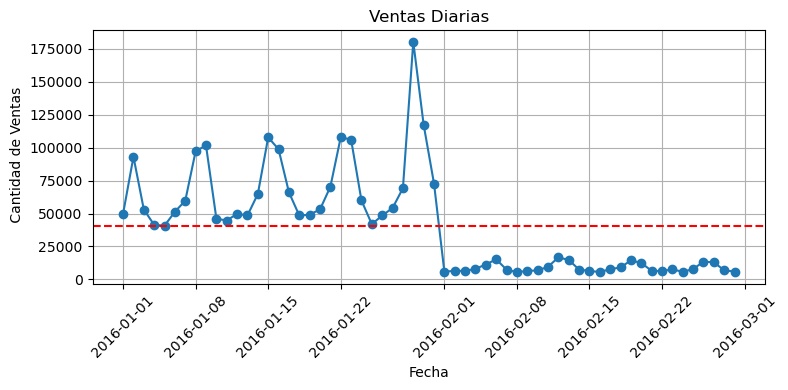

-------------------------------------------------------------------------------------------
LA VENTAS SON MUY VARIABLES POR LO QUE ES IMPORTANTE UTILIZAR LA FUNCION DE STOCK OPTIMO = STOCK BASE + STOCK DE SEGURIDAD


In [501]:
#5.  DEFINICION DE STOCK OPTIMO
#   A. DEFINIR FUNCION DE STOCK OPTIMO
ventas_diarias = data6.groupby('SalesDate')['SalesQuantity'].sum()
ventas_diarias1=ventas_diarias.reset_index()
promedio=ventas_diarias.mean()
ventas_diarias1["promedio"]=promedio

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(ventas_diarias.index, ventas_diarias.values, marker='o')
plt.axhline(y=promedio, color='red', linestyle='--', label=f'Promedio: {promedio:.2f}')
plt.title('Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel(' Cantidad de Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("-------------------------------------------------------------------------------------------")
print("LA VENTAS SON MUY VARIABLES POR LO QUE ES IMPORTANTE UTILIZAR LA FUNCION DE STOCK OPTIMO = STOCK BASE + STOCK DE SEGURIDAD")

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'PurchasePrice',
       'VendorName', 'Quantity', 'lead_time_mean', 'lead_time_std'],
      dtype='object')
Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorName',
       'SalesPrice', 'Sales_Quantity_mean', 'Sales_Quantity_std',
       'Sales_Quantity_sum'],
      dtype='object')


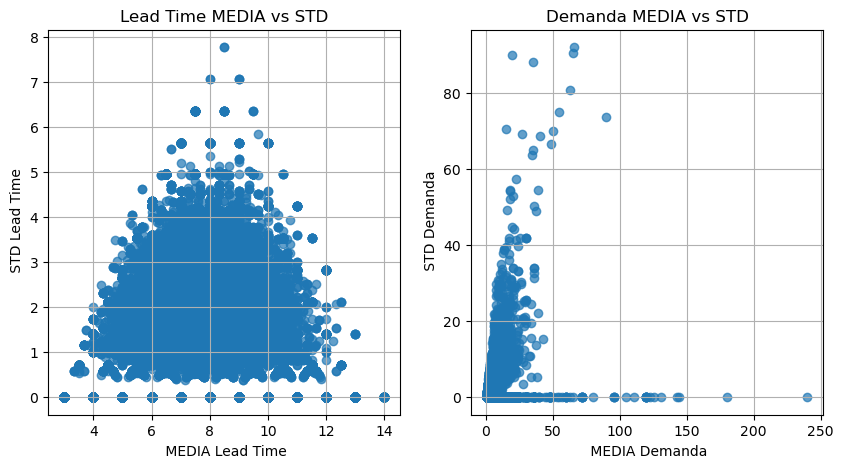

-------------------------------------------------------------------------------------------
AL OBSERVAR EL GRAFICO DE LEAD TIME SE DETECTA QUE LA MEDIA Y LA DESVIACION STANDART DEL TIEMPO DE REPOSICION TIENEN ALTA DISPERCION, LO QUE INDICA QUE EL TIEMPO DE REPOSICION ES MUY VARIABLES
AL OBSERVAR EL GRAFICO DE DEMANDA MEDIA DETECTA QUE LA MEDIA Y LA DESVIACION STANDART DE LA  DEMANDA DIARIA TIENEN ALTA DISPERCION, LO QUE INDICA QUE LA DEMANDA DIARIA ES MUY VARIABLE
-------------------------------------------------------------------------------------------
CON MAYOR RAZON ES IMPORTANTE UTILIZAR LA FUNCION DE STOCK OPTIMO= STOCK BASE + STOCK DE SEGURIDAD


In [53]:
#5. DEFINICION DE STOCK OPTIMO
#  B. DEFINIR TIEMPO DE REPOSICION, TIEMPO DE REPOSICION MEDIO, TIEMPO REPOSICION STD PARA CADA InventoryId (tabla lead_time)
#     a. Defimos el tiempo de reposicion (lead time) para cada producto en cada detalle de compra
data5["lead_time"]=(data5["ReceivingDate"]-data5["PODate"]).dt.days  #en dias

#     b. Agrupamos compras por InventoryId → defimos la media y std del tiempo de reposicion
lead_time = data5.groupby("InventoryId").agg({
    "Store": "first",
    "Brand": "first",
    "Description": "first",
    "Size": "first",
    "PurchasePrice":"first",
    "VendorName":"first",
    "Quantity":"sum",
    "lead_time": ["mean", "std"]
}).reset_index()
lead_time.columns = ["InventoryId", "Store", "Brand", "Description","Size","PurchasePrice","VendorName","Quantity","lead_time_mean", "lead_time_std"]
print(lead_time.columns)
lead_time["lead_time_std"] = lead_time["lead_time_std"].fillna(0)

#  C. DEFINIR DEMANDA DIARIA, DEMANDA DIARIA MEDIA, STD DEMANADA DIARIA  PARA CADA InventoryId (tabla demanda)
#     a. b. Agrupamos ventas por InventoryId y Fecha → defimos total cantidades vendidos de cada id en cada fecha
ventas_por_id_por_dia = data6.groupby(["InventoryId", "SalesDate"]).agg({
    "Store": "first",
    "Brand": "first",
    "Description": "first",
    "Size": "first",
    "VendorName":"first",
    "SalesPrice": "mean",
    "SalesQuantity": "sum"
}).reset_index()


#    b. Luego, agrupamos solo por ID, y definimos cantidad total de ventas (demanda), su media diaria y las std para cada ID
demanda_diaria = ventas_por_id_por_dia.groupby("InventoryId").agg({
    "Store": "first",
    "Brand": "first",
    "Description": "first",
    "Size": "first",
    "VendorName":"first",
    "SalesPrice": "mean",
    "SalesQuantity": ["mean", "std","sum"]
}).reset_index()
demanda_diaria.columns = ["InventoryId", "Store", "Brand", "Description","Size","VendorName","SalesPrice","Sales_Quantity_mean","Sales_Quantity_std","Sales_Quantity_sum"]
print(demanda_diaria.columns)
demanda_diaria["Sales_Quantity_std"] = demanda_diaria["Sales_Quantity_std"].fillna(0)

#GRAFICOS MEDIA Y STD DE CADA TABLA PARA VER LA VIARABILIDAD
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].scatter(lead_time["lead_time_mean"], lead_time["lead_time_std"], alpha=0.7)
axs[0].set_title("Lead Time MEDIA vs STD")
axs[0].set_ylabel(" STD Lead Time")
axs[0].set_xlabel(" MEDIA Lead Time")
axs[0].grid(True)

axs[1].scatter(demanda_diaria["Sales_Quantity_mean"], demanda_diaria["Sales_Quantity_std"], alpha=0.7)
axs[1].set_title("Demanda MEDIA vs STD")
axs[1].set_ylabel(" STD Demanda")
axs[1].set_xlabel(" MEDIA Demanda")
axs[1].grid(True)

plt.show()

print("-------------------------------------------------------------------------------------------")
print("AL OBSERVAR EL GRAFICO DE LEAD TIME SE DETECTA QUE LA MEDIA Y LA DESVIACION STANDART DEL TIEMPO DE REPOSICION TIENEN ALTA DISPERCION, LO QUE INDICA QUE EL TIEMPO DE REPOSICION ES MUY VARIABLES")
print("AL OBSERVAR EL GRAFICO DE DEMANDA MEDIA DETECTA QUE LA MEDIA Y LA DESVIACION STANDART DE LA  DEMANDA DIARIA TIENEN ALTA DISPERCION, LO QUE INDICA QUE LA DEMANDA DIARIA ES MUY VARIABLE")
print("-------------------------------------------------------------------------------------------")
print("CON MAYOR RAZON ES IMPORTANTE UTILIZAR LA FUNCION DE STOCK OPTIMO= STOCK BASE + STOCK DE SEGURIDAD")

In [55]:
# #5. DEFINICION DE STOCK OPTIMO
#    D. UNIR TABLAS INVENTARIO INICIAL, INVENTARIO FINAL, LEAD_TIME Y DEMANDA
#       a. Tablas inventario: Unimos Tabla Inventario Incial (data2) con Tabla Inventario Final (data3) 
# Unimos tablas con merge
merge_data = pd.merge(
    data2,
    data3,
    on="InventoryId",how="outer",suffixes=("_inicio", "_fin")
)
# Rellenamos infomracion de los InventoryId
columnas_base = ['Store', 'City', 'Brand', 'Description', 'Size', 'Price']
for col in columnas_base:
    merge_data[col] = merge_data[f"{col}_inicio"].combine_first(merge_data[f"{col}_fin"]) #Primero el valor de la columna con sufijo _inicio .Si ese valor es NaN, toma el de la columna con sufijo _fin

#eliminamos filas duplicados y que no usamos
cols_a_eliminar = [f"{col}_inicio" for col in columnas_base] + [f"{col}_fin" for col in columnas_base] + ["startDate", "endDate"]
merge_data.drop(cols_a_eliminar, axis=1, inplace=True)

#Remplaazamos nulos de inventarios por cero
merge_data["onHand_inicio"] = merge_data["onHand_inicio"].fillna(0)
merge_data["onHand_fin"] = merge_data["onHand_fin"].fillna(0)

#Incorporamos VendorName a la tabla
merge_dataA = pd.merge(
    merge_data,
    data1[["Brand","VendorName"]],
    on="Brand",how="left"
)

print(merge_dataA.isnull().sum())

InventoryId      0
onHand_inicio    0
onHand_fin       0
Store            0
City             0
Brand            0
Description      0
Size             0
Price            0
VendorName       0
dtype: int64


In [57]:
# #5. DEFINICION DE STOCK OPTIMO
#    D. UNIR TABLAS INVENTARIO INICIAL, INVENTARIO FINAL, LEAD_TIME Y DEMANDA DIARIA
#       b. Unimos Tabla Inventarios (merge_data2) con lead_time 
merge_data2 = pd.merge(
    merge_dataA,
    lead_time,
    on="InventoryId",how="outer",suffixes=("_inicio", "_fin")
)
#    b. Rellenamos infomracion de los InventoryId
columnas_base = ['Store', 'Brand', 'Description','Size',"VendorName"]
for col in columnas_base:
    merge_data2[col] = merge_data2[f"{col}_inicio"].combine_first(merge_data2[f"{col}_fin"])  #Primero el valor de la columna con sufijo _inicio .Si ese valor es NaN, toma el de la columna con sufijo _fin

cols_a_eliminar = [f"{col}_inicio" for col in columnas_base] + [f"{col}_fin" for col in columnas_base] 
merge_data2.drop(cols_a_eliminar, axis=1, inplace=True)
merge_data2["onHand_inicio"] = merge_data2["onHand_inicio"].fillna(0)
merge_data2["onHand_fin"] = merge_data2["onHand_fin"].fillna(0)

data_city=data3.groupby("Store").agg({"City": "first"}).reset_index()


#    c. Remplaazamos nulos de City (ya que la tabla lea_time (data5) no tiene la columa City)
merge_data3 = pd.merge(merge_data2,
    data_city,
    on="Store",
    how="left",
    suffixes=("", "_new")
)

merge_data3.drop(columns="City",inplace=True)
merge_data3.rename(columns={"City_new": "City"}, inplace=True)

#   d. Remplaazamos nulos de Price (ya que la tabla merge_dataA (data1 y data5) no tiene la columa Price)
merge_data3A = pd.merge(merge_data3,
    data1[["Brand","Price","PurchasePrice"]],
    on="Brand",
    how="left",
    suffixes=("", "_new")
)
merge_data3A.drop(columns=["Price","PurchasePrice"], inplace=True)
merge_data3A.rename(columns={"Price_new": "Price","PurchasePrice_new": "PurchasePrice"}, inplace=True)
print(merge_data3A.columns)

print(merge_data3A.isnull().sum())


Index(['InventoryId', 'onHand_inicio', 'onHand_fin', 'Quantity',
       'lead_time_mean', 'lead_time_std', 'Store', 'Brand', 'Description',
       'Size', 'VendorName', 'City', 'Price', 'PurchasePrice'],
      dtype='object')
InventoryId           0
onHand_inicio         0
onHand_fin            0
Quantity          30482
lead_time_mean    30482
lead_time_std     30482
Store                 0
Brand                 0
Description           0
Size                  0
VendorName            0
City                  0
Price                 0
PurchasePrice         0
dtype: int64


In [59]:
# #5. DEFINICION DE STOCK OPTIMO
#    D. UNIR TABLAS INVENTARIO INICIAL, INVENTARIO FINAL, LEAD_TIME Y DEMANDA DIARIA
#       b. Unimos Tabla Inventarios + lead_time (merge_data3) con DEMANDA DIARIA  
merge_data4 = pd.merge(
    merge_data3A,
    demanda_diaria,
    on="InventoryId",how="outer",suffixes=("_inicio", "_fin")
)

#    b. Rellenamos infomracion de los InventoryId
columnas_base = ['Store', 'Brand', 'Description','Size','VendorName']
for col in columnas_base:
    merge_data4[col] = merge_data4[f"{col}_inicio"].combine_first(merge_data4[f"{col}_fin"])

cols_a_eliminar = [f"{col}_inicio" for col in columnas_base] + [f"{col}_fin" for col in columnas_base] 
merge_data4.drop(cols_a_eliminar, axis=1, inplace=True)

merge_data4["Store"]=merge_data4["Store"].astype(str)
merge_data4["Brand"]=merge_data4["Brand"].astype(str)

print(merge_data4.isnull().sum())


InventoryId                 0
onHand_inicio               0
onHand_fin                  0
Quantity                30482
lead_time_mean          30482
lead_time_std           30482
City                        0
Price                       0
PurchasePrice               0
SalesPrice             106258
Sales_Quantity_mean    106258
Sales_Quantity_std     106258
Sales_Quantity_sum     106258
Store                       0
Brand                       0
Description                 0
Size                        0
VendorName                  0
dtype: int64


In [529]:
# #5. DEFINICION DE STOCK OPTIMO
#    E. ESTIMAR DEMANDA DIARIA MEDIA Y TIEMPO DE REPOSICION PARA PRODUCTOS SIN VENTAS O SIN COMPRAS, A FIN DE PODER OBTENER STOCK OPTIMO.
#      a. Estimamos faltantes de "Quantity", "lead_time_mean", "lead_time_std"

# Resguardamos columnas originales
merge_data4["Quantity_original"]=merge_data4["Quantity"]
merge_data4["Demanda_Original"]=merge_data4["Sales_Quantity_sum"]
merge_data5=merge_data4.copy()

# Configuración de columnas
onehot_cols  = ["City", "Store","Size"] # pocas categorías
target_cols  = ["VendorName", "Brand"] # muchas categorías
num_cols     = ["Price", "PurchasePrice","onHand_inicio","onHand_fin"] # columnas numéricas
columnas_rellenar = ["Quantity", "lead_time_mean", "lead_time_std"]

# Aplicamos la funcion de estimacion con maching learning (la funcion se encuenta al final del dataset) 
for col in columnas_rellenar:
    rellenar_semejantes(merge_data5, col, onehot_cols, target_cols, num_cols)


🔍 Evaluación para 'Quantity':
   R² (acierto): 97.19%
   MAE: 19.63
   RMSE: 54.33
✅ 'Quantity' completado con Random Forest + encoding mixto.
🔍 Evaluación para 'lead_time_mean':
   R² (acierto): 90.23%
   MAE: 0.32
   RMSE: 0.46
✅ 'lead_time_mean' completado con Random Forest + encoding mixto.
🔍 Evaluación para 'lead_time_std':
   R² (acierto): 90.81%
   MAE: 0.23
   RMSE: 0.33
✅ 'lead_time_std' completado con Random Forest + encoding mixto.


In [531]:
# #5. DEFINICION DE STOCK OPTIMO
#    E. ESTIMAR DEMANDA DIARIA MEDIA Y TIEMPO DE REPOSICION PARA PRODUCTOS SIN VENTAS O SIN COMPRAS, A FIN DE PODER OBTENER STOCK OPTIMO.
#      b.Estimamos faltantes de "Sales_Quantity_sum","Sales_Quantity_mean", "Sales_Quantity_std"
onehot_cols  = ["City", "Store","Size"] # pocas categorías
target_cols  = ["VendorName", "Brand"] # muchas categorías
num_cols     = ["Price", "PurchasePrice","onHand_inicio","onHand_fin","Quantity","lead_time_mean"]
columnas_rellenar = ["Sales_Quantity_sum","Sales_Quantity_mean", "Sales_Quantity_std"]

#  b. Aplicamos la funcion de estimacion con maching learning (la funcion se encuenta al final del dataset) 
for col in columnas_rellenar:
    rellenar_semejantes(merge_data5, col, onehot_cols, target_cols, num_cols)

🔍 Evaluación para 'Sales_Quantity_sum':
   R² (acierto): 97.35%
   MAE: 2.20
   RMSE: 5.22
✅ 'Sales_Quantity_sum' completado con Random Forest + encoding mixto.
🔍 Evaluación para 'Sales_Quantity_mean':
   R² (acierto): 89.81%
   MAE: 0.26
   RMSE: 0.82
✅ 'Sales_Quantity_mean' completado con Random Forest + encoding mixto.
🔍 Evaluación para 'Sales_Quantity_std':
   R² (acierto): 90.14%
   MAE: 0.25
   RMSE: 0.59
✅ 'Sales_Quantity_std' completado con Random Forest + encoding mixto.


In [ ]:
#Exportamos el dataframe con los valores estimados para que no se pierdan las estimaciones realizadas
#merge_data5.to_excel("data_final_completo.xlsx")

#Volvemos a cargar los datos para seguir trabajando
merge_data5=pd.read_excel("data_final_completo.xlsx")
print(merge_data5.columns)

In [63]:
merge_data5["Brand"]=merge_data5["Brand"].astype(str)
merge_data5["Store"]=merge_data5["Store"].astype(str)

In [65]:
#remplazamos SalesPrice con Price de data 1
mascara_nulos = merge_data5[merge_data5["SalesPrice"].isnull()]  #Detalle de compras con Size nulo
print("La cantidad de nulos en SalesPrice, son: ",len(mascara_nulos)) 

# Merge para traer el campo Size desde data1
merge_data6 = merge_data5.merge(
    data1[["Brand", "Price"]],
    on="Brand",
    how="left",
    suffixes=("", "_from_data1"))

# Reemplazamos valores nulos de 'Size' con los de data1
merge_data6["SalesPrice"] = merge_data6["SalesPrice"].fillna(merge_data6["Price"])

# Eliminamos la columna auxiliar
merge_data6.drop(columns=["Price"], inplace=True)

print("-------Luego del remplazo--------------")
mascara_nulos = merge_data6[merge_data6["SalesPrice"].isnull()]  #producto sin Size
print("la Cantidad de Detalle de Compra con Size nulos es; ",len(mascara_nulos), " y esos productos son",set(mascara_nulos["Brand"])) 
print("-------------------------------------")
print(merge_data6.isnull().sum())

La cantidad de nulos en SalesPrice, son:  106258
-------Luego del remplazo--------------
la Cantidad de Detalle de Compra con Size nulos es;  0  y esos productos son set()
-------------------------------------
InventoryId                 0
onHand_inicio               0
onHand_fin                  0
Quantity                    0
lead_time_mean              0
lead_time_std               0
City                        0
PurchasePrice               0
SalesPrice                  0
Sales_Quantity_mean         0
Sales_Quantity_std          0
Sales_Quantity_sum          0
Store                       0
Brand                       0
Description                 0
Size                        0
VendorName                  0
Quantity_original       30482
Demanda_Original       106258
Price_from_data1            0
dtype: int64


Index(['InventoryId', 'onHand_inicio', 'onHand_fin', 'Quantity',
       'lead_time_mean', 'lead_time_std', 'City', 'PurchasePrice',
       'SalesPrice', 'Sales_Quantity_mean', 'Sales_Quantity_std',
       'Sales_Quantity_sum', 'Store', 'Brand', 'Description', 'Size',
       'VendorName', 'Quantity_original', 'Demanda_Original',
       'Price_from_data1', 'Demanda_Estimada', 'Demanda_Estimada_diaria'],
      dtype='object')
La cantidad de Inventory_ID con ventas Diarias Medias (Sales_Quantity_mean) mayor a 35 es:  109


Text(0.5, 0.98, 'Relacion Demanda Estimada Diaria (formula base ) vs Demanda Estimada Diaria (MachingLearning)')

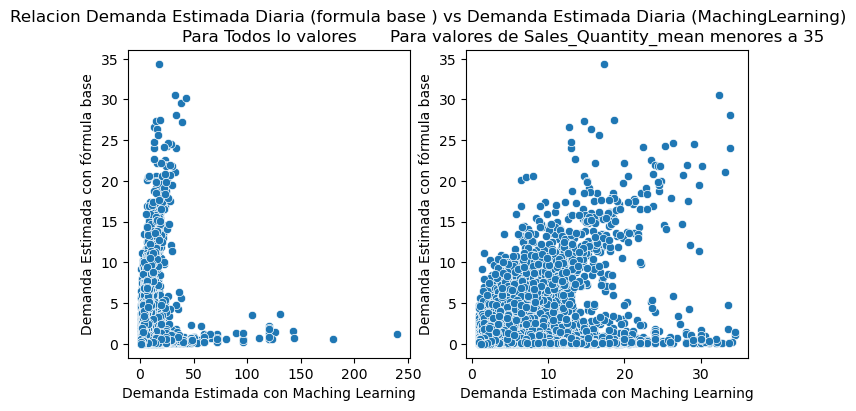

In [67]:
#5. DEFINICION DE STOCK OPTIMO
#  F. DEFINIR DEMANDA MEDIA DIARIA ¿Con Formula Basica o con Maching Learning?
#    a. Formula Basica   
# Demanda diaria estimada = Inventario Inicial + Compras - Inventario Final
merge_data6["Demanda_Estimada"]=merge_data6["onHand_inicio"]+merge_data6['Quantity']-merge_data6["onHand_fin"]
merge_data6["Demanda_Estimada_diaria"]=merge_data6["Demanda_Estimada"]/365
print(merge_data6.columns)

#     b. Maching Learning
# En el apartado anterior se estimo ""Sales_Quantity_mean", demanda diaria media
merge_data8=merge_data6[merge_data6["Sales_Quantity_mean"]<35]
merge_data8A=merge_data6[merge_data6["Sales_Quantity_mean"]>35]
print("La cantidad de Inventory_ID con ventas Diarias Medias (Sales_Quantity_mean) mayor a 35 es: ",len(merge_data8A))

#GRAFICAMOS LA DIFERENCIA ENTRE DEMANDA DIARIA ESTIMADA CON FORMULA (Demanda_Estimada) VS DEMANDA DIARIA ESTIMADA CON MACHING LEARNING (Sales_Quantity_mean)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
sns.scatterplot(data=merge_data6, x="Sales_Quantity_mean", y="Demanda_Estimada_diaria",ax=axs[0])
axs[0].set_title("Para Todos lo valores")
axs[0].set_xlabel("Demanda Estimada con Maching Learning")
axs[0].set_ylabel("Demanda Estimada con fórmula base")

sns.scatterplot(data=merge_data8, x="Sales_Quantity_mean", y="Demanda_Estimada_diaria",ax=axs[1])
axs[1].set_title("Para valores de Sales_Quantity_mean menores a 35" )
axs[1].set_xlabel("Demanda Estimada con Maching Learning")
axs[1].set_ylabel("Demanda Estimada con fórmula base")


plt.suptitle("Relacion Demanda Estimada Diaria (formula base ) vs Demanda Estimada Diaria (MachingLearning)")


In [69]:
#5. DEFINICION DE STOCK OPTIMO
#  G. Determinamos Stock Optimo
nivel_seguridad=1.65
#Stock Base 
merge_data6["Stock_base"]=merge_data6["Sales_Quantity_mean"]*merge_data6["lead_time_mean"]
#Stock Seguridad
merge_data6["Stock_seguridad"]=np.sqrt((np.square(merge_data6["Sales_Quantity_mean"])*np.square(merge_data6["lead_time_std"]))+(np.square(merge_data6["Sales_Quantity_std"])*np.square(merge_data6["lead_time_mean"])))  
merge_data6["Stock_seguridad"] = merge_data6["Stock_seguridad"].clip(lower=0) #que no alla negativos ni nulos
#Stock Optimo
merge_data6["Stock_optimo"]= merge_data6["Stock_base"] + nivel_seguridad * merge_data6["Stock_seguridad"]
print(merge_data6.columns)

Index(['InventoryId', 'onHand_inicio', 'onHand_fin', 'Quantity',
       'lead_time_mean', 'lead_time_std', 'City', 'PurchasePrice',
       'SalesPrice', 'Sales_Quantity_mean', 'Sales_Quantity_std',
       'Sales_Quantity_sum', 'Store', 'Brand', 'Description', 'Size',
       'VendorName', 'Quantity_original', 'Demanda_Original',
       'Price_from_data1', 'Demanda_Estimada', 'Demanda_Estimada_diaria',
       'Stock_base', 'Stock_seguridad', 'Stock_optimo'],
      dtype='object')


In [77]:
#5. DEFINICION DE STOCK OPTIMO Y DEMANDA ESTIMADA
#  G. "Exportamos tabla de Stock Optimo de Demanda Estimada
#    a. Stock Optimo
Inventario_optimo=merge_data6[["InventoryId","Brand","onHand_inicio", "onHand_fin", "Stock_base", "Stock_seguridad", "Stock_optimo"]]
print("--------columnas de tabla Inventario_optimo----------")
print(Inventario_optimo.columns)
#Exportamos el archivo
Inventario_optimo.to_csv("Inventario_optimo.csv")


#    b. Demanda Estimda
Demanda_estimada=merge_data6[["InventoryId", "Brand","SalesPrice", "Sales_Quantity_mean", "Demanda_Estimada",'Demanda_Estimada_diaria']].copy()
Demanda_estimada["Demanda_Estimada_diaria_con_ML"]= Demanda_estimada["Sales_Quantity_mean"]
Demanda_estimada["Demanda_Estimada_anual_con_ML"]= Demanda_estimada["Sales_Quantity_mean"]*365
# Renombrar columnas
Demanda_estimada = Demanda_estimada.rename(columns= {
    'Demanda_Estimada': 'Demanda_Estimada_anual_con_FB',
    'Demanda_Estimada_diaria': 'Demanda_Estimada_diaria_con_FB'
    
})
print("--------columnas de tabla Demanda Estimada----------")
print(Demanda_estimada.columns)
Demanda_estimada.to_csv("Demanda_estimada.csv")

#    c  Inventory_ID
print("--------columnas de tabla Inventory_id----------")
Inventory_id=merge_data6[["InventoryId","Brand","Store", "City"]]
print(Inventory_id.columns)
Inventory_id.to_csv("Id_inventory.csv")

--------columnas de tabla Inventario_optimo----------
Index(['InventoryId', 'Brand', 'onHand_inicio', 'onHand_fin', 'Stock_base',
       'Stock_seguridad', 'Stock_optimo'],
      dtype='object')
--------columnas de tabla Demanda Estimada----------
Index(['InventoryId', 'Brand', 'SalesPrice', 'Sales_Quantity_mean',
       'Demanda_Estimada_anual_con_FB', 'Demanda_Estimada_diaria_con_FB',
       'Demanda_Estimada_diaria_con_ML', 'Demanda_Estimada_anual_con_ML'],
      dtype='object')
--------columnas de tabla Inventory_id----------
Index(['InventoryId', 'Brand', 'Store', 'City'], dtype='object')


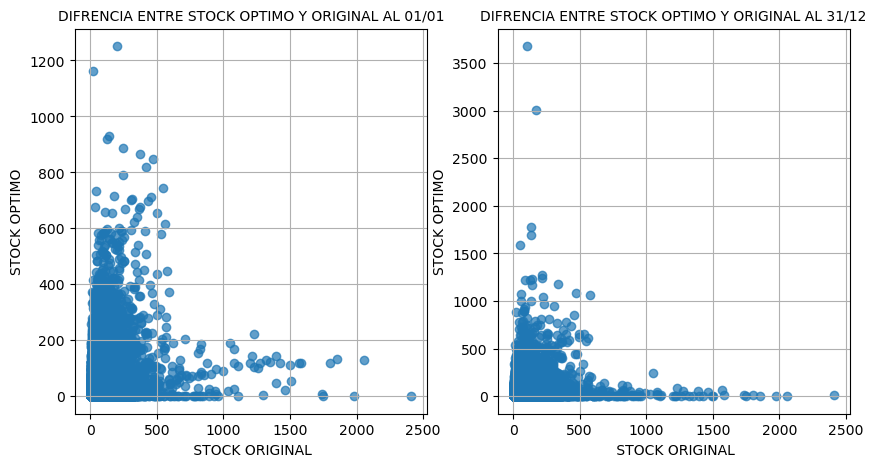

In [79]:
# 6. ANÁLISIS EXPLORATORIO DE DATOS
#  A. Diferencia entre stock óptimo y stock original
#    a. Hacemos scatter plot para ver la diferencias de stocks
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].scatter(merge_data6["Stock_optimo"], merge_data6["onHand_inicio"], alpha=0.7)
axs[0].set_title("DIFRENCIA ENTRE STOCK OPTIMO Y ORIGINAL AL 01/01",size=10)
axs[0].set_ylabel("STOCK OPTIMO")
axs[0].set_xlabel(" STOCK ORIGINAL")
axs[0].grid(True)

axs[1].scatter(merge_data6["Stock_optimo"], merge_data6["onHand_fin"], alpha=0.7)
axs[1].set_title("DIFRENCIA ENTRE STOCK OPTIMO Y ORIGINAL AL 31/12",size=10)
axs[1].set_ylabel("STOCK OPTIMO")
axs[1].set_xlabel(" STOCK ORIGINAL")
axs[1].grid(True)

plt.show()

In [81]:
#VAMOS A CAMBIAR EL NOMBRE DEL DATASET
merge_data4=merge_data6.copy()

-2408.9870413595036 1146.9539237976471
-2395.9870413595036 3570.5837831351464


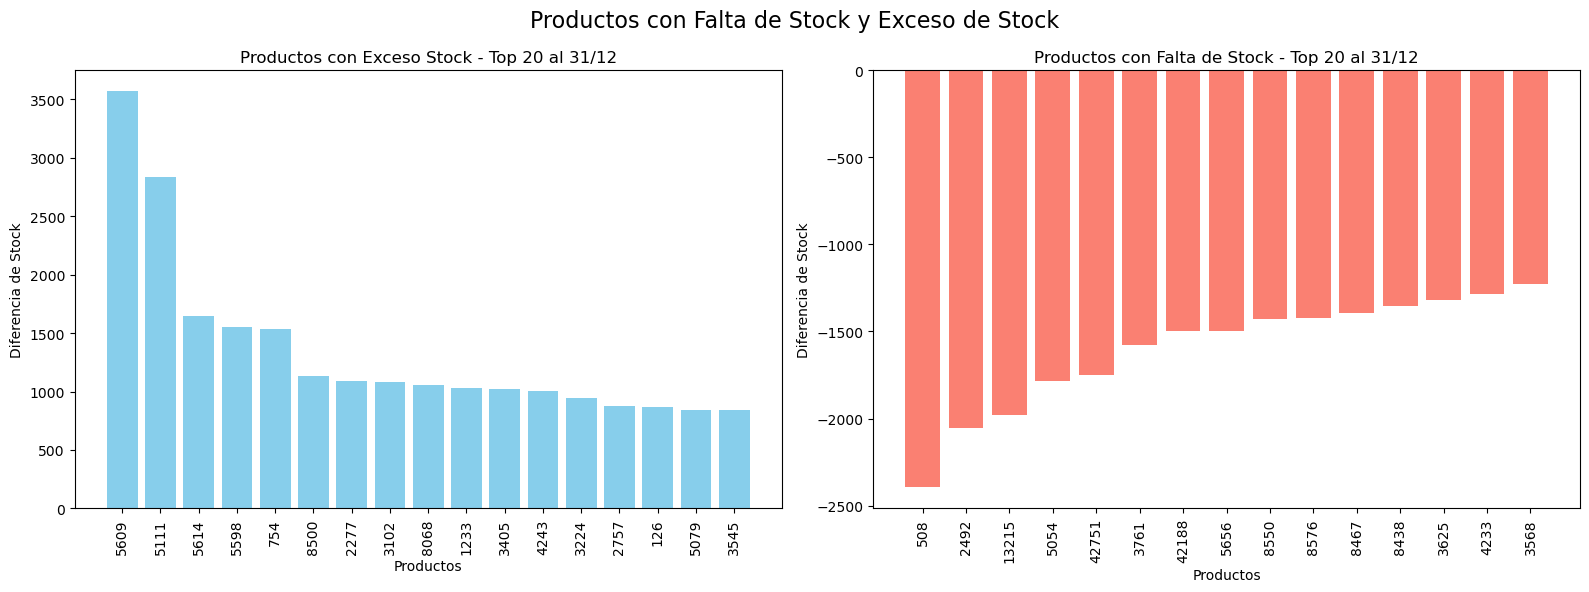

In [89]:
# 11. ANÁLISIS EXPLORATORIO DE DATOS
#  B. Productos con mucho stock y con poco stock 
#    a. Definimos diferencias de stock
merge_data4["Difrencia_stock_0101"]=merge_data4["onHand_inicio"]-merge_data4["Stock_optimo"]
merge_data4["Difrencia_stock_3112"]=merge_data4["onHand_fin"] - merge_data4["Stock_optimo"]
print(merge_data4["Difrencia_stock_0101"].min(),merge_data4["Difrencia_stock_0101"].max())
print(merge_data4["Difrencia_stock_3112"].min(),merge_data4["Difrencia_stock_3112"].max())

#    b.Tomamos primeros 50 productos con bajo stock y con exceso de stock
merge_data4["Brand"]= merge_data4["Brand"].astype(str)
merge_data4_A= merge_data4.sort_values("Difrencia_stock_3112", ascending=False).head(20).copy() # primer 50 productos con exceso stock
merge_data4_B= merge_data4.sort_values("Difrencia_stock_3112", ascending=True).head(20).copy()  # primer 50 productos con falta de stock

#    c.Graficamos con grafico de barras
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico 1: Bajo stock al 31/12
axs[0].bar(merge_data4_A["Brand"], merge_data4_A["Difrencia_stock_3112"], color='skyblue')
axs[0].set_title('Productos con Exceso Stock - Top 20 al 31/12')
axs[0].set_xlabel('Productos')
axs[0].set_ylabel('Diferencia de Stock')
axs[0].tick_params(axis='x', rotation=90)

# Gráfico 2: Exceso stock al 31/12
axs[1].bar(merge_data4_B["Brand"], merge_data4_B["Difrencia_stock_3112"], color='salmon')
axs[1].set_title('Productos con Falta de Stock - Top 20 al 31/12')
axs[1].set_xlabel('Productos')
axs[1].set_ylabel('Diferencia de Stock')
axs[1].tick_params(axis='x', rotation=90)
fig.suptitle("Productos con Falta de Stock y Exceso de Stock", fontsize=16)
plt.tight_layout()
plt.show()


In [93]:
plt.savefig("graficos_eda_final.png")  # Guarda la figura como imagen PNG
plt.show()

<Figure size 640x480 with 0 Axes>

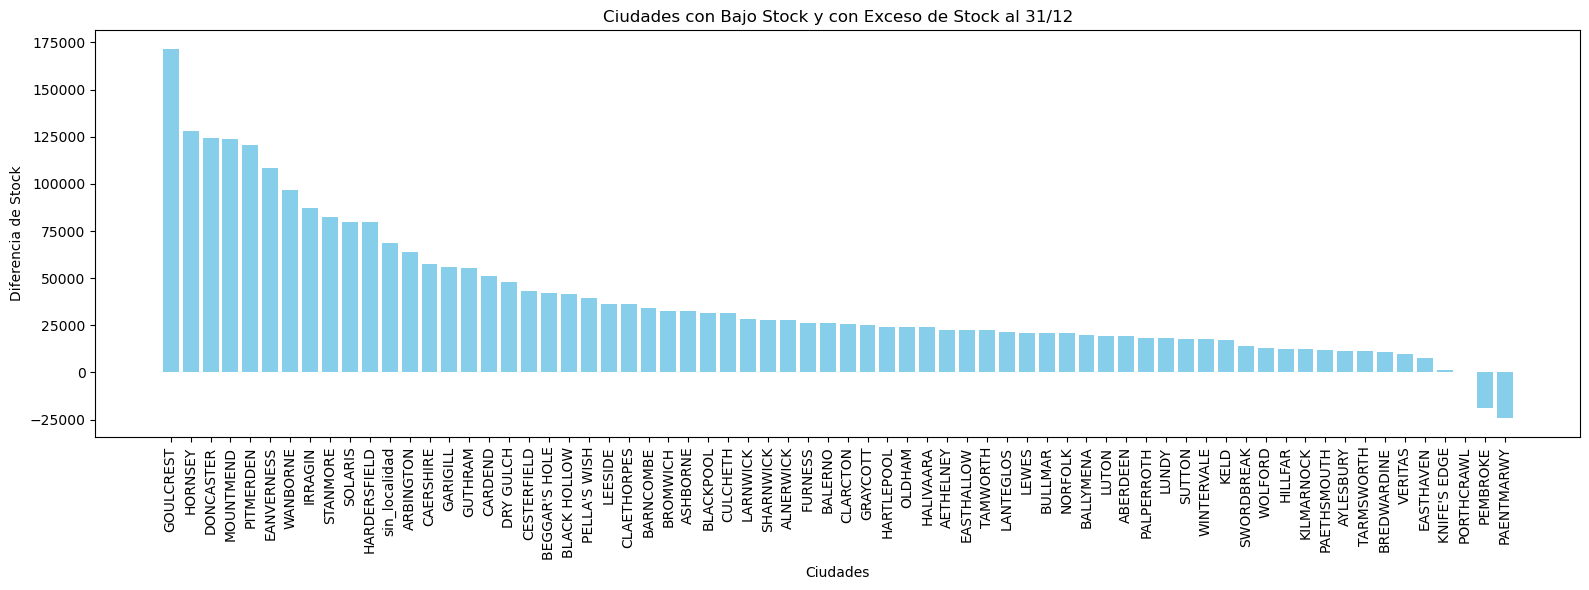

In [307]:
# 11. ANÁLISIS EXPLORATORIO DE DATOS
#  B. Ciudades con mucho stock y con poco stock 
#    a. Definimos diferencias de stock
merge_data4_city=merge_data4.groupby("City")["Difrencia_stock_3112"].sum().reset_index()

#    b.Tomamos primeros 50 productos con bajo stock y con exceso de stock

merge_data4_city_A= merge_data4_city.sort_values("Difrencia_stock_3112", ascending=False).copy() # primer 50 productos con bajo stock
merge_data4_city_B= merge_data4_city.sort_values("Difrencia_stock_3112", ascending=True).copy()  # primer 50 productos con exceso de stock

#    c.Graficamos con grafico de barras
plt.subplots(figsize=(16, 6))

# Gráfico 1: Diferencia de stock al 31/12
plt.bar(merge_data4_city_A["City"], merge_data4_city_A["Difrencia_stock_3112"], color='skyblue')
plt.title('Ciudades con Bajo Stock y con Exceso de Stock al 31/12')
plt.xlabel('Ciudades')
plt.ylabel('Diferencia de Stock')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


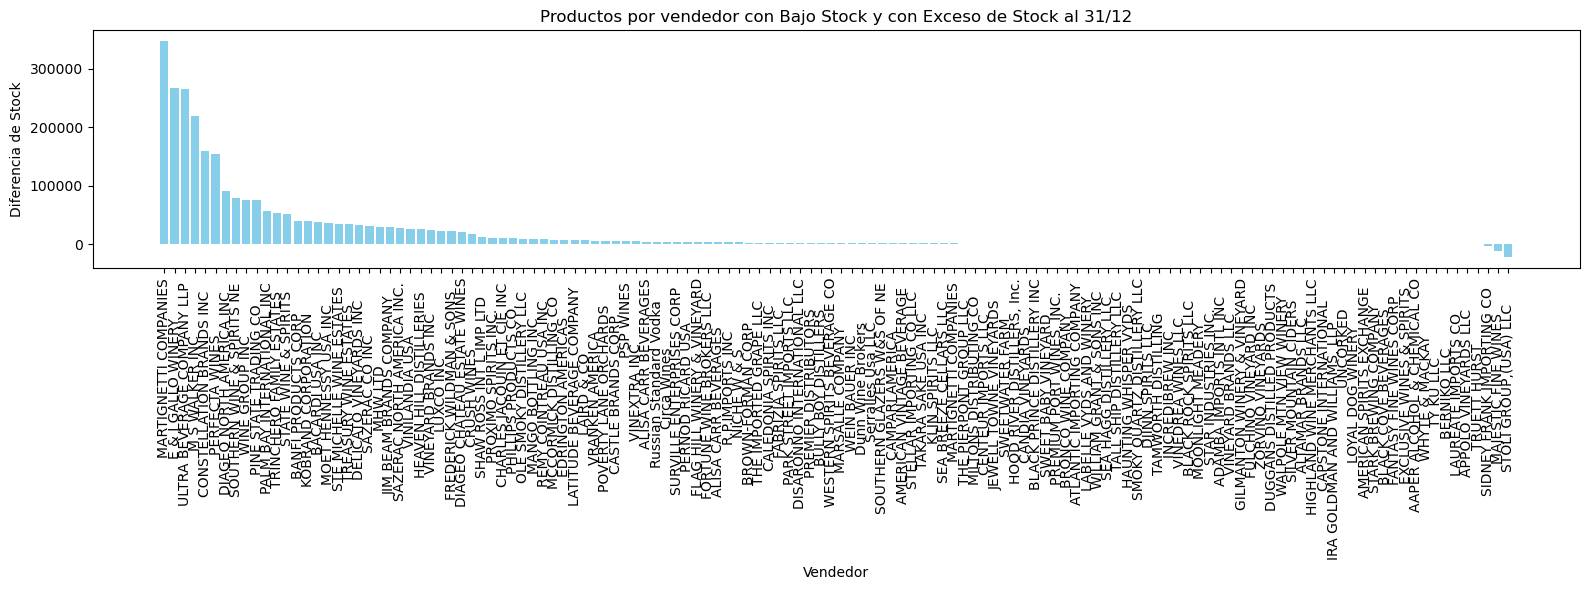

In [309]:
# 11. ANÁLISIS EXPLORATORIO DE DATOS
#  C. Productos por vendedor con mucho stock y con poco stock 
#    a. Agrupamos por vendedor name
merge_data4_vendor=merge_data4.groupby("VendorName")["Difrencia_stock_3112"].sum().reset_index()

#    b.Tomamos primeros 50 productos con bajo stock y con exceso de stock

merge_data4_vendor_A= merge_data4_vendor.sort_values("Difrencia_stock_3112", ascending=False).copy() # primer 50 productos con bajo stock
merge_data4_vendor_B= merge_data4_vendor.sort_values("Difrencia_stock_3112", ascending=True).copy()  # primer 50 productos con exceso de stock

#    c.Graficamos con grafico de barras
plt.subplots(figsize=(16, 6))

# Gráfico 1: Diferencia de stock al 31/12
plt.bar(merge_data4_vendor_A["VendorName"], merge_data4_vendor_A["Difrencia_stock_3112"], color='skyblue')
plt.title('Productos por vendedor con Bajo Stock y con Exceso de Stock al 31/12')
plt.xlabel('Vendedor')
plt.ylabel('Diferencia de Stock')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


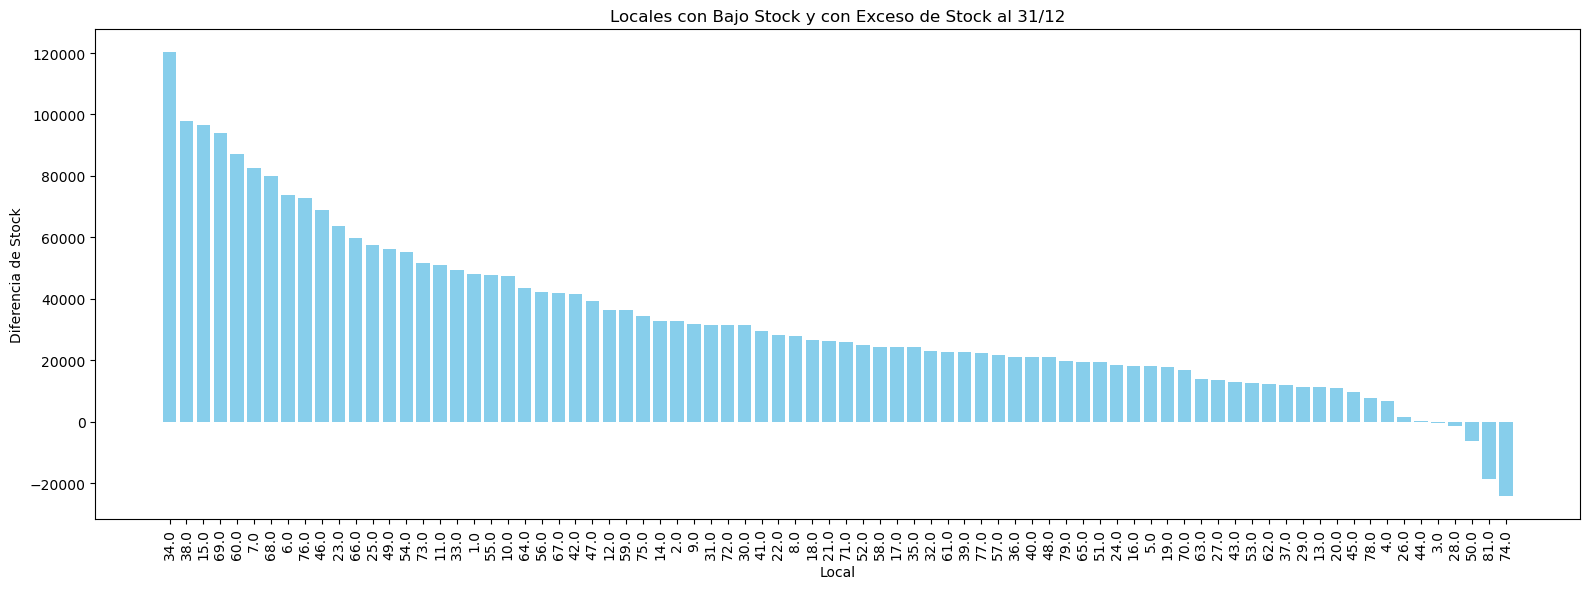

In [313]:
# 11. ANÁLISIS EXPLORATORIO DE DATOS
#  B. Productos por vendedor con mucho stock y con poco stock 
#    a. Agrupamos por vendedor name
merge_data4["Store"]= merge_data4["Store"].astype(str)
merge_data4_vendor=merge_data4.groupby("Store")["Difrencia_stock_3112"].sum().reset_index()

#    b.Tomamos primeros 50 productos con bajo stock y con exceso de stock

merge_data4_store_A= merge_data4_vendor.sort_values("Difrencia_stock_3112", ascending=False).copy() # primer 50 productos con bajo stock
merge_data4_store_B= merge_data4_vendor.sort_values("Difrencia_stock_3112", ascending=True).copy()  # primer 50 productos con exceso de stock

#    c.Graficamos con grafico de barras
plt.subplots(figsize=(16, 6))

# Gráfico 1: Diferencia de stock al 31/12
plt.bar(merge_data4_store_A["Store"], merge_data4_store_A["Difrencia_stock_3112"], color='skyblue')
plt.title('Locales con Bajo Stock y con Exceso de Stock al 31/12')
plt.xlabel('Local')
plt.ylabel('Diferencia de Stock')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


C:\Users\amali\AppData\Local\Temp\ipykernel_24692\1767185102.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='Set1')


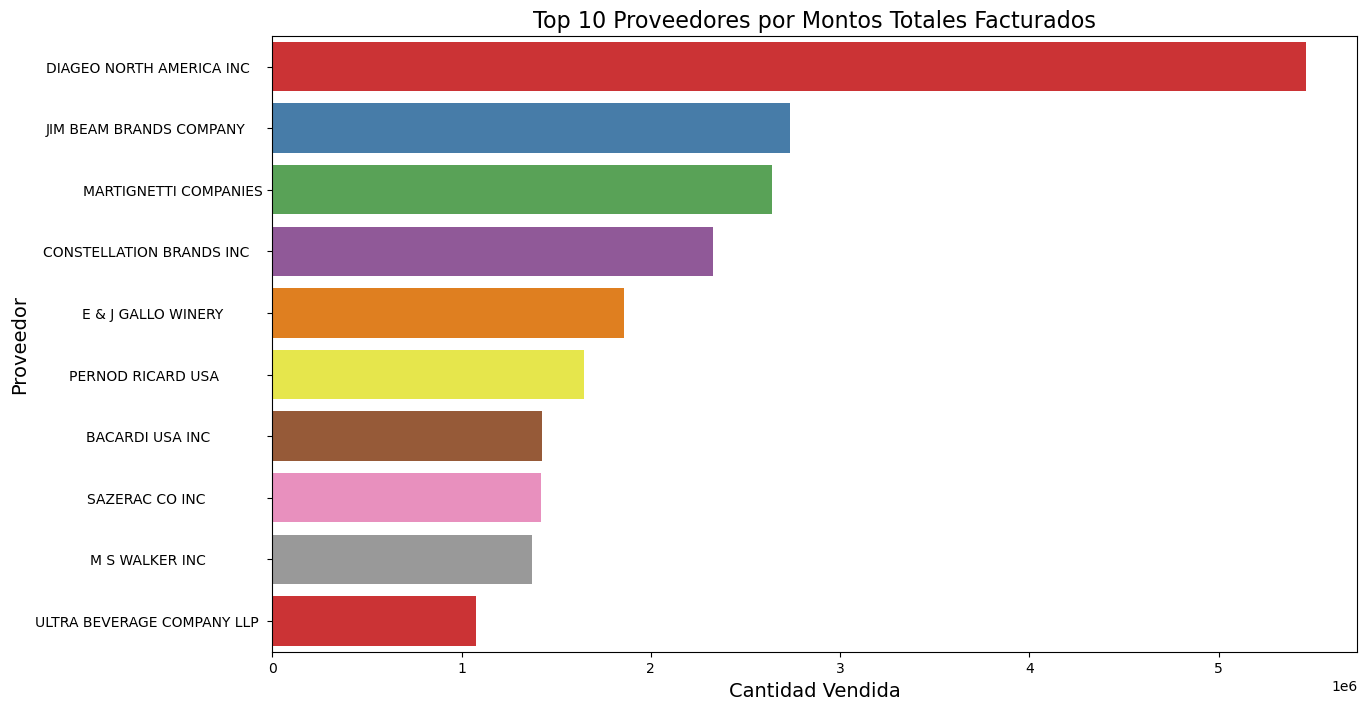

In [315]:
# 3. Gráfico de barras de montos por proveedor 🏢
plt.figure(figsize=(14, 8))
top_vendors = data5.groupby('VendorName')['Quantity'].sum().nlargest(10)
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='Set1')
plt.title('Top 10 Proveedores por Cantidad Total Vendida', fontsize=16)
plt.xlabel('Cantidad Vendida', fontsize=14)
plt.ylabel('Proveedor', fontsize=14)
plt.show()

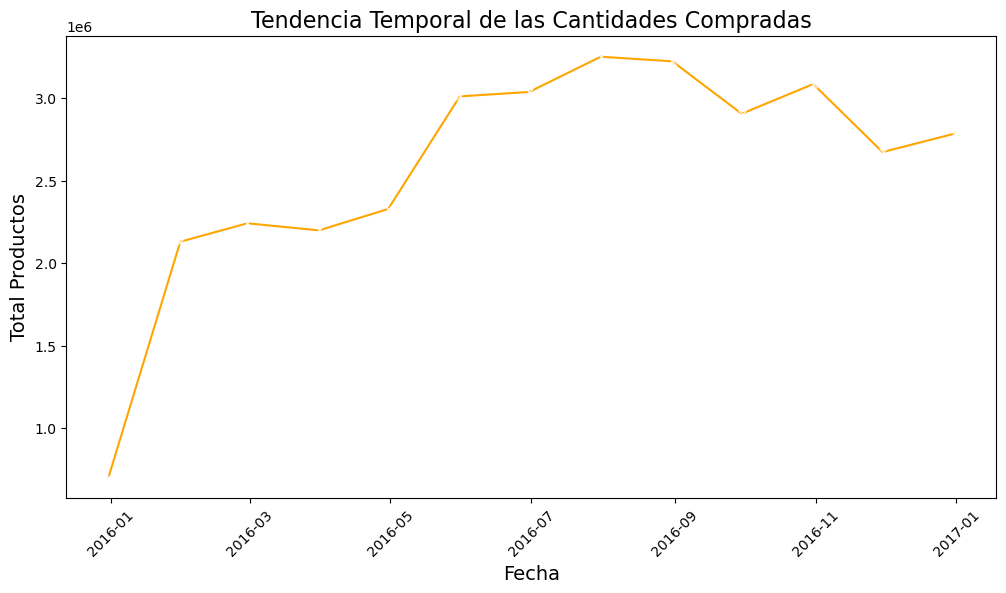

In [323]:
# 4. Gráfico de línea de tendencia temporal de las compras ⏰
monthly_totals = data5.resample('ME', on='PODate')['Quantity'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_totals, marker='x', color='orange')
plt.title('Tendencia Temporal de las Cantidades Compradas', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Total Productos', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#FUNCIONES

In [521]:
def rellenar_semejantes(df, columna_objetivo, onehot_cols, target_cols, num_cols):
    df_train = df[df[columna_objetivo].notna()].copy()
    df_pred  = df[df[columna_objetivo].isna()].copy()

    if df_train.empty or df_pred.empty:
        print(f"⚠️  No se puede predecir '{columna_objetivo}': no hay suficientes datos.")
        return

    # Target encoding
    encoder = ce.TargetEncoder(cols=target_cols)
    df_train.loc[:, target_cols] = encoder.fit_transform(df_train[target_cols], df_train[columna_objetivo])
    df_pred.loc[:, target_cols]  = encoder.transform(df_pred[target_cols])

    # ColumnTransformer
    preprocessor = ColumnTransformer([
        ("ohe", OneHotEncoder(handle_unknown="ignore"), onehot_cols),
        ("num", SimpleImputer(strategy="mean"), num_cols)
    ], remainder="passthrough")

    model = Pipeline([
        ("pre", preprocessor),
        ("reg", RandomForestRegressor(n_estimators=50, max_features="sqrt", random_state=42, n_jobs=-1))
    ])

    features = onehot_cols + target_cols + num_cols

    # Entrenar
    model.fit(df_train[features], df_train[columna_objetivo])

    # Métricas
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    y_true = df_train[columna_objetivo]
    y_pred = model.predict(df_train[features])
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5

    print(f"🔍 Evaluación para '{columna_objetivo}':")
    print(f"   R² (acierto): {r2:.2%}")
    print(f"   MAE: {mae:.2f}")
    print(f"   RMSE: {rmse:.2f}")

    # Predecir faltantes
    predicciones = model.predict(df_pred[features])
    df.loc[df_pred.index, columna_objetivo] = predicciones

    print(f"✅ '{columna_objetivo}' completado con Random Forest + encoding mixto.")


In [453]:
# B. Seleccionamos variables predictoras
features = ["City", "Store", "VendorName", "Price", "PurchasePrice", "Brand", "Size","onHand_inicio","onHand_fin","lead_time_mean"]
# C. Columnas categóricas y numéricas
onehot_cols  = ["City", "Store","VendorName"] # pocas categorías
target_cols  = ["Brand"]  # muchas categorías
num_cols = ["Price", "PurchasePrice", "lead_time_mean", "Sales_Quantity_mean"]  # Columnas numéricas

def rellenar_semejantes(df, columna_objetivo, onehot_cols, target_cols, num_cols):
    df_train = df[df[columna_objetivo].notna()].copy()
    df_pred  = df[df[columna_objetivo].isna()].copy()

    # Verificación
    if df_train.empty or df_pred.empty:
        print(f"⚠️  No se puede predecir '{columna_objetivo}': no hay suficientes datos.")
        return

    # Target encoding fuera del ColumnTransformer
    encoder = ce.TargetEncoder(cols=target_cols)
    df_train.loc[:, target_cols] = encoder.fit_transform(df_train[target_cols], df_train[columna_objetivo])
    df_pred.loc[:, target_cols]  = encoder.transform(df_pred[target_cols])

    # ColumnTransformer: OneHot para categóricas de baja cardinalidad, imputación para numéricas
    preprocessor = ColumnTransformer([
        ("ohe", OneHotEncoder(handle_unknown="ignore"), onehot_cols),
        ("num", SimpleImputer(strategy="mean"), num_cols)
    ], remainder="passthrough")

    # Modelo
    model = Pipeline([
        ("pre", preprocessor),
        ("reg", RandomForestRegressor(n_estimators=50, max_features="sqrt", random_state=42, n_jobs=-1))
    ])

    # Variables predictoras
    features = onehot_cols + target_cols + num_col

    # Entrenamiento y predicción
    model.fit(df_train[features], df_train[columna_objetivo])
    predicciones = model.predict(df_pred[features])
    df.loc[df_pred.index, columna_objetivo] = predicciones

    print(f"✅ '{columna_objetivo}' completado con Random Forest + encoding mixto.")


In [447]:
# 1. FUNCION PARA EDA INICAL
# Configurar Pandas para mostrar todo
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', None)  # Evita el truncamiento por ancho
pd.set_option('display.max_colwidth', None)  # Muestra todo el contenido

def eda_report(df, name):
    print("\n" + "="*60)
    print(f"EDA REPORT: {name}")
    print("="*60)

    # Información básica
    print("\n--- FORMA DEL DATAFRAME ---")
    print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")

    print("\n--- PRIMERAS FILAS ---")
    print(df.head())

    print("\n--- TIPOS DE DATOS POR COLUMNA ---")
    print(df.dtypes)

    # Valores nulos
    print("\n--- VALORES NULOS POR COLUMNA ---")
    nulos = df.isnull().sum()
    porcentaje = (nulos / len(df)) * 100
    resumen_nulos = pd.DataFrame({
        'Cantidad de nulos': nulos,
        'Porcentaje (%)': porcentaje.round(2)
    })
    resumen_nulos = resumen_nulos[resumen_nulos['Cantidad de nulos'] > 0]
    
    if resumen_nulos.empty:
        print("No hay valores nulos.")
    else:
        print(resumen_nulos.sort_values(by='Cantidad de nulos', ascending=False))

    # Descripción de variables numéricas
    print("\n--- DESCRIPCIÓN DE VARIABLES NUMÉRICAS ---")
    numeric_cols = df.select_dtypes(include=np.number).columns
    if len(numeric_cols) > 0:
        print(df[numeric_cols].describe())
    else:
        print("No hay variables numéricas.")

    # Descripción de variables categóricas
    print("\n--- DESCRIPCIÓN DE VARIABLES CATEGÓRICAS ---")
    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        print(df[cat_cols].describe())
    else:
        print("No hay variables categóricas.")

In [449]:
#2. FUNCION BOXPLOT
def graficar_boxplot_histograma(df,df1,col1, col2, idx, name):
    # Boxplot de col1 vs col2
    sns.boxplot(data=df1, ax=axes[idx][0])
    axes[idx][0].set_title(f'Boxplot data {name}')
        
    # Histograma de col1
    sns.histplot(df[col1], kde=True, ax=axes[idx][1])
    axes[idx][1].set_title(f'Histograma  data ')
        
    # Histograma de col2
    sns.histplot(df[col2], kde=True, ax=axes[idx][2])
    axes[idx][2].set_title(f'Histograma data ')

    sns.scatterplot(data=df, x=col1, y=col2, ax=axes[idx][3])
    axes[idx][3].set_title(f'Dispersión data {name} ')
